In [ ]:
!pip install mpi4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 17.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.4-cp38-cp38-linux_x86_64.whl size=4438537 sha256=636c3eef43fe84d13dbf9d86a8c6d9f10af4bcec067dba207258b8afbaaedaca
  Stored in directory: /root/.cache/pip/wheels/f3/35/48/0b9a7076995eea5ea64a7e4bc3f0f342f453080795276264e7
Successfully built mpi4py


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from mpi4py import MPI

In [ ]:
img_size = (150, 300)

transform = transforms.Compose(
    [transforms.Resize(img_size),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
trainset = torchvision.datasets.CIFAR100(root='./data', train = True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train = False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 100
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
classes = ('beaver', 'dolphin', 'otter', 'seal', 'whale',
'aquarium fish', 'flatfish', 'ray', 'shark', 'trout',
'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
'bottles', 'bowls', 'cans', 'cups', 'plates',
'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
'furniture	bed', 'chair', 'couch', 'table', 'wardrobe',
'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
'bear', 'leopard', 'lion', 'tiger', 'wolf',
'bridge', 'castle', 'house', 'road', 'skyscraper',
'cloud', 'forest', 'mountain', 'plain', 'sea',
'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
'crab', 'lobster', 'snail', 'spider', 'worm',
'baby', 'boy', 'girl', 'man', 'woman',
'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
'maple', 'oak', 'palm', 'pine', 'willow',
'bicycle', 'bus', 'motorcycle', 'pickup', 'truck', 'train',
'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor')

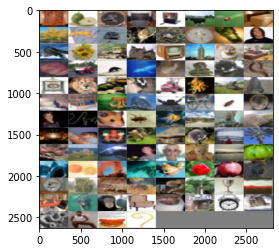

truck chimpanzee oranges palm  palm  plates ray   clock house wolf  girl  skunk woman porcupine trout castle train rabbit willow cans  palm  dinosaur camel clock baby  willow woman train caterpillar lobster kangaroo snake oranges tiger orchids crocodile leopard sea   maple caterpillar hamster aquarium fish pine  dinosaur computer keyboard shark sweet peppers orchids poppies tank  beetle sweet peppers dolphin spider otter couch bear  otter bridge plates butterfly woman roses cattle computer keyboard cans  train streetcar castle tiger boy   shrew man   plain roses man   hamster motorcycle beaver lion  porcupine lawn-mower lamp  flatfish television cattle telephone fox   clock furniture	bed mushrooms apples bridge butterfly oranges lobster snake streetcar orchids tank 


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
!mpirun -n 4 --allow-run-as-root python3 train.py

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
0it [00:00, ?it/s]/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weig

In [ ]:
!mpirun -n 4 --allow-run-as-root python3 test.py

Predicted:  d o g
Predicted:  d o g
Predicted:  s h i p
Predicted:  t r u c k
Predicted:  h o r s e
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and